In [39]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

import trading_calendars as tc
import pytz

In [40]:
# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'NextEra Energy': 'NEE',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'Alphabet Inc. (Class A)': 'GOOGL',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'General Motors': 'GM',
 'HCA Healthcare': 'HCA',
 'Amgen Inc.': 'AMGN',
 'JPMorgan Chase & Co.': 'JPM',
 'Netflix Inc.': 'NFLX',
 'UnitedHealth Group Inc.': 'UNH',
 'Visa Inc.': 'V',
 'Vulcan Materials': 'VMC',
 'Verizon Communications': 'VZ','Lincoln National': 'LNC',
 'Waste Management Inc.': 'WM',  
 'Target Corp.': 'TGT',
 'Prologis': 'PLD',
 'Chevron Corp.': 'CVX',
 'Pioneer Natural Resources': 'PXD',
 'Progressive Corp.': 'PGR',
 'Nucor Corp.': 'NUE',
 'TJX Companies Inc.': 'TJX',
 '3M Company': 'MMM',
 'Medtronic plc': 'MDT',
 'Lilly (Eli) & Co.': 'LLY',
 'Masco Corp.': 'MAS',
 'Kroger Co.': 'KR',
 'AmerisourceBergen': 'ABC',
 'Applied Materials Inc.': 'AMAT',
 'Deere & Co.': 'DE',
 'United Parcel Service': 'UPS',
 'Lennar Corp.': 'LEN',
 'Whirlpool Corp.': 'WHR',
 'Lincoln National': 'LNC',
 'Adobe Inc.': 'ADBE',
 'Celanese': 'CE'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [41]:
# df=pd.read_csv('SP500_List.csv')

# localhost:5000/volatility_score?basket=AAPL, TSLA, BA

In [42]:
# df[df['GICS Sector']=='Industrials']['Symbol']
# df[df['GICS Sector']=='Materials']['Symbol']
# df[df['GICS Sector']=='Energy']['Symbol']
# df[df['GICS Sector']=='Healthcare']['Symbol']
# df[df['GICS Sector']=='Financials']['Symbol']
# df[df['GICS Sector']=='Technology']['Symbol']
# df[df['GICS Sector']=='Utilities']['Symbol']
# df[df['GICS Sector']=='Real Estate']['Symbol']
# df[df['GICS Sector']=='Consumer Discretionary']['Symbol']
# df[df['GICS Sector']=='Consumer Staples']['Symbol']
# df[df['GICS Sector']=='Communication']['Symbol']

In [43]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
# start_date = '2016-05-20'
# start_date = '2018-05-20'
start_date = '2011-05-20' #2 NaN's
end_date = '2021-05-20'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2011-05-20', '2011-05-23', '2011-05-24', '2011-05-25',
               '2011-05-26', '2011-05-27', '2011-05-31', '2011-06-01',
               '2011-06-02', '2011-06-03',
               ...
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'NEE'),
            ('Adj Close',  'IBM'),
            ...
            (   'Volume',  'MAS'),
            (   'Volume',   'KR'),
            (   'Volume',  'ABC'),
            (   'Volume', 'AMAT'),
            (   'Volume',  

In [45]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']


# df=panel_data.dropna()
# df=panel_data.isnull()

# print(stock_close)
print(stock_close.iloc[0])
# print(df)

Symbols
AMZN     198.649994
AAPL      11.972143
WBA       44.369999
NOC       64.500000
BA        77.519997
LMT       79.750000
MCD       82.330002
INTC      23.219999
NEE       14.445000
IBM      170.160004
TXN       35.000000
MA        27.757000
MSFT      24.490000
GE        18.865385
GOOGL    262.277283
AXP       51.189999
PEP       71.300003
KO        34.150002
JNJ       65.690002
GM        31.180000
HCA       34.630001
AMGN      60.860001
JPM       43.130001
NFLX      35.128571
UNH       49.740002
V         19.557501
VMC       40.259998
VZ        37.150002
LNC       29.209999
WM        38.869999
TGT       49.689999
PLD       35.310001
CVX      102.570000
PXD       90.940002
PGR       21.650000
NUE       41.799999
TJX       13.155000
MMM       93.559998
MDT       42.209999
LLY       38.439999
MAS       12.521968
KR        12.485000
ABC       41.590000
AMAT      14.090000
DE        84.750000
UPS       74.050003
LEN       17.659784
WHR       81.959999
ADBE      35.310001
CE        50

In [46]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [47]:
len(companies)

50

In [48]:
movements

array([[ 6.99996948e-01,  6.60003662e-01, -3.72999573e+00, ...,
        -6.03000488e+01,  3.68000488e+01,  3.28002930e+00],
       [-1.54999733e-01,  1.58213615e-01, -1.18214607e-01, ...,
        -1.70999908e+00,  1.52999878e+00,  2.07999420e+00],
       [ 2.79998779e-01,  5.00000000e-01, -1.59999847e-01, ...,
        -1.00002289e-01,  4.00009155e-02,  3.19999695e-01],
       ...,
       [-7.50000000e-01, -4.79995728e-01, -4.30000305e-01, ...,
        -5.20001221e+00,  2.39999390e+00, -2.89993286e-01],
       [-1.49997711e-01, -2.90000916e-01, -4.20001984e-01, ...,
        -4.01000977e+00,  7.45001221e+00,  7.99002075e+00],
       [-1.39999390e-01, -9.20001984e-01, -9.99984741e-02, ...,
        -1.96000671e+00, -3.20007324e-01,  2.40005493e-01]])

In [49]:
xnys = tc.get_calendar("XNYS")
date=xnys.sessions_in_range(
     pd.Timestamp("2011-05-20", tz=pytz.UTC),
     pd.Timestamp("2021-05-20", tz=pytz.UTC)
)

In [76]:


date.columns=df.columns.str.replace(' 00:00:00+00:00','')
date

DatetimeIndex(['2011-05-20 00:00:00+00:00', '2011-05-23 00:00:00+00:00',
               '2011-05-24 00:00:00+00:00', '2011-05-25 00:00:00+00:00',
               '2011-05-26 00:00:00+00:00', '2011-05-27 00:00:00+00:00',
               '2011-05-31 00:00:00+00:00', '2011-06-01 00:00:00+00:00',
               '2011-06-02 00:00:00+00:00', '2011-06-03 00:00:00+00:00',
               ...
               '2021-05-07 00:00:00+00:00', '2021-05-10 00:00:00+00:00',
               '2021-05-11 00:00:00+00:00', '2021-05-12 00:00:00+00:00',
               '2021-05-13 00:00:00+00:00', '2021-05-14 00:00:00+00:00',
               '2021-05-17 00:00:00+00:00', '2021-05-18 00:00:00+00:00',
               '2021-05-19 00:00:00+00:00', '2021-05-20 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=2517, freq='C')

In [80]:
movements_df= pd.DataFrame(movements, index=companies_dict.keys(), columns=date)
movements_df

,2011-05-20 00:00:00+00:00,2011-05-23 00:00:00+00:00,2011-05-24 00:00:00+00:00,2011-05-25 00:00:00+00:00,2011-05-26 00:00:00+00:00,2011-05-27 00:00:00+00:00,2011-05-31 00:00:00+00:00,2011-06-01 00:00:00+00:00,2011-06-02 00:00:00+00:00,2011-06-03 00:00:00+00:00,...,2021-05-07 00:00:00+00:00,2021-05-10 00:00:00+00:00,2021-05-11 00:00:00+00:00,2021-05-12 00:00:00+00:00,2021-05-13 00:00:00+00:00,2021-05-14 00:00:00+00:00,2021-05-17 00:00:00+00:00,2021-05-18 00:00:00+00:00,2021-05-19 00:00:00+00:00,2021-05-20 00:00:00+00:00
Amazon,0.699997,0.660004,-3.729996,-1.310013,3.759995,-0.629990,0.750000,-3.660004,1.369995,-2.909988,...,-27.479980,-91.830078,87.629883,-33.060059,-24.000000,37.339844,24.459961,-60.300049,36.800049,3.280029
Apple,-0.155000,0.158214,-0.118215,0.119643,-0.034643,0.093214,0.240356,-0.120001,-0.014286,0.009285,...,-0.639999,-2.560005,2.410004,-0.630005,0.389999,1.199997,-0.550003,-1.709999,1.529999,2.079994
Walgreen,0.279999,0.500000,-0.160000,0.020000,0.010002,-0.160000,-0.360001,-0.340000,-0.169998,0.380001,...,0.029999,-0.130001,-1.009998,-1.099998,1.309998,0.149998,0.450001,-0.100002,0.040001,0.320000
Northrop Grumman,-0.430000,1.099998,0.400002,-0.279999,0.290001,0.449997,0.099998,-1.250000,0.110001,0.340000,...,1.450012,0.500000,-3.730011,-5.470001,7.230011,0.609985,0.369995,-3.250000,2.619995,0.789978
Boeing,-0.370003,-0.270004,-0.889999,1.059998,0.120003,-0.040001,0.229996,-2.599998,0.250000,0.129997,...,5.669998,-3.910004,2.320007,-6.470001,-0.360001,2.479996,1.739990,0.300003,1.240005,2.519989
Lockheed Martin,-0.620003,0.210007,-0.560005,-0.059998,-0.610001,0.180000,0.630005,-2.000000,-0.049995,1.059998,...,3.339996,1.780029,-3.209991,-7.350006,5.989990,0.609985,1.489990,-4.049988,0.540009,1.529999
McDonalds,-0.459999,0.970001,-0.010002,0.150002,-0.440002,-0.509995,-0.589996,-0.489998,-0.199997,0.440002,...,-0.160004,2.009995,-3.880005,-4.169998,1.770004,1.009995,0.869995,0.039993,-0.080002,1.459991
Intel,-0.240000,-0.059999,-0.279999,0.160000,-0.120001,-0.250000,0.059999,-0.450001,0.080000,-0.060001,...,-0.030003,-1.180000,-0.009998,-0.770000,-0.030003,0.750000,0.040001,-1.110001,1.290001,0.380001
NextEra Energy,-0.177501,0.045000,-0.052500,-0.045000,0.072499,0.012500,0.080000,-0.175000,-0.137500,0.325000,...,0.029999,0.460007,0.449997,-1.959999,0.479996,0.120003,-1.099998,0.540001,1.050003,1.160004
IBM,-0.239990,-0.320007,-0.509995,0.119995,-0.280014,-0.410004,0.489990,-2.339996,-0.350006,0.750000,...,-0.459991,0.369995,-0.770004,-2.539993,2.720001,-0.430008,0.669998,-0.869995,0.869995,0.760010


In [59]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


Company: Apple, Change: -1046.0123748779297
Company: AmerisourceBergen, Change: 24.76308536529541
Company: Adobe Inc., Change: 21.629915237426758
Company: Applied Materials Inc., Change: 81.13984680175781
Company: Amgen Inc., Change: -132.99021911621094
Company: Amazon, Change: 12.1107177734375
Company: American Express, Change: 54.710289001464844
Company: Boeing, Change: 59.04996109008789
Company: Celanese, Change: 38.400031089782715
Company: Chevron Corp., Change: 71.77993774414062
Company: Deere & Co., Change: 102.24995040893555
Company: General Electric, Change: 6.082340240478516
Company: General Motors, Change: 85.95986557006836
Company: Alphabet Inc. (Class A), Change: -13.99110460281372
Company: HCA Healthcare, Change: 595.3433227539062
Company: IBM, Change: 30.61023712158203
Company: Intel, Change: 72.92019653320312
Company: Johnson & Johnson, Change: 9.279953002929688
Company: JPMorgan Chase & Co., Change: 43.659942626953125
Company: Coca Cola, Change: -45.17009162902832
Compa

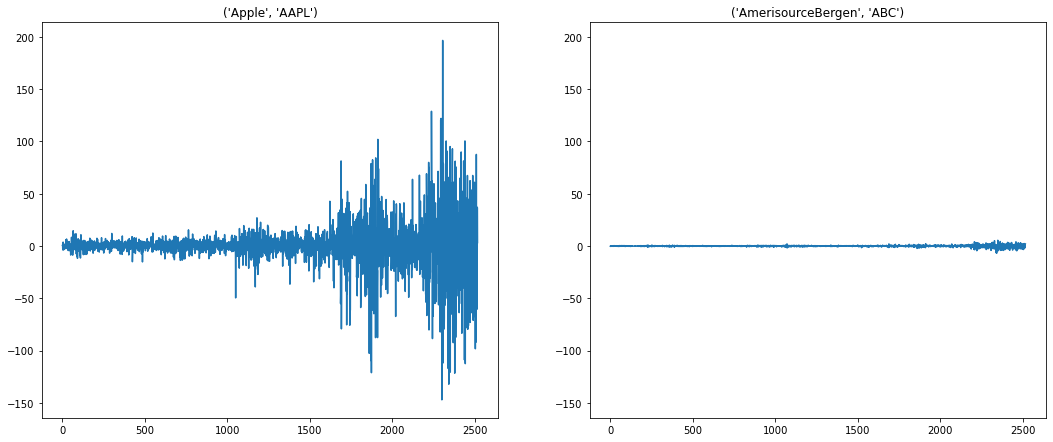

In [62]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [63]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.24926543653153815
-0.27746462154229634
0.0002144243969682568


In [64]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

#https://pythonforfinance.net/2018/02/08/stock-clusters-using-k-means-algorithm-in-python/


# returns = companies.pct_change().mean() * 252
# returns = pd.DataFrame(returns)
# returns.columns = ['Returns']
# returns['Volatility'] = companies.pct_change().std() * sqrt(252)
# #format the data as a numpy array to feed into the K-Means algorithm
# data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
# X = data
# distorsions = []
# for k in range(2, 20):
#     k_means = KMeans(n_clusters=k)
#     k_means.fit(X)
#     distorsions.append(k_means.inertia_)
# fig = plt.figure(figsize=(15, 5))
# plt.plot(range(2, 20), distorsions)
# plt.grid(True)
# plt.title('Elbow curve')

In [65]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [66]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [67]:
# To check how well the algorithm did use print(kmeans.inertia_)
#Intertia is a score of how close each cluster is, so a lower inertia score is better. 

print(kmeans.inertia_)

22.225106948869588


In [68]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                         companies
49       0       (Waste Management Inc., WM)
35       0                      (Pepsi, PEP)
33       0           (Northrop Grumman, NOC)
32       0              (Netflix Inc., NFLX)
28       0              (Medtronic plc, MDT)
26       0                (Masco Corp., MAS)
19       0                   (Coca Cola, KO)
27       1                  (McDonalds, MCD)
8        1                    (Celanese, CE)
17       1          (Johnson & Johnson, JNJ)
16       1                     (Intel, INTC)
25       2                  (MasterCard, MA)
48       2            (Whirlpool Corp., WHR)
23       2            (Lockheed Martin, LMT)
0        2                     (Apple, AAPL)
12       2              (General Motors, GM)
14       2             (HCA Healthcare, HCA)
11       2            (General Electric, GE)
1        2          (AmerisourceBergen, ABC)
31       3             (NextEra Energy, NEE)
47       3                   (Walgreen, WBA)
46       3

In [69]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                         companies
13       0  (Alphabet Inc. (Class A), GOOGL)
22       0          (Lilly (Eli) & Co., LLY)
20       0                  (Kroger Co., KR)
32       0              (Netflix Inc., NFLX)
15       0                        (IBM, IBM)
26       0                (Masco Corp., MAS)
46       0      (Verizon Communications, VZ)
44       0                    (Visa Inc., V)
4        0                (Amgen Inc., AMGN)
34       1                (Nucor Corp., NUE)
39       1               (Target Corp., TGT)
21       1               (Lennar Corp., LEN)
31       1             (NextEra Energy, NEE)
48       2            (Whirlpool Corp., WHR)
23       2            (Lockheed Martin, LMT)
1        2          (AmerisourceBergen, ABC)
0        2                     (Apple, AAPL)
12       2              (General Motors, GM)
14       2             (HCA Healthcare, HCA)
25       3                  (MasterCard, MA)
11       3            (General Electric, GE)
10       3

<Figure size 432x288 with 0 Axes>

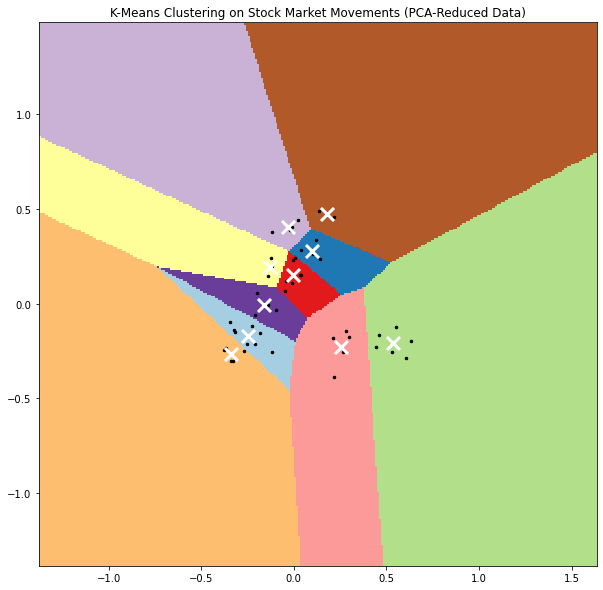

In [82]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
fig.savefig('static/charts/cluster.png')
plt.show()

ValueError: cannot copy sequence with size 50 to array axis with dimension 2517

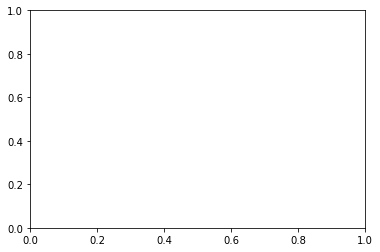

In [74]:
fig, ax=plt.subplots()
plt.plot([date], [movements_df])